# What type of content should "Netflix" invest in for 2026 to grow as a platform?

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df=pd.read_csv("C:/Users/KIIT0001/Downloads/netflix_titles.csv/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Cleaning

In [4]:
print(df.isnull().sum())  #checks for number of missing values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [5]:
# 3. Clean: Fill missing 'country' with "Unknown" and drop rows with missing dates
df['country'] = df['country'].fillna('Unknown')
df.dropna(subset=['date_added'], inplace=True)

In [6]:
# 4. Fix Date Format: Convert 'date_added' to a real date object
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())
df['year_added'] = df['date_added'].dt.year

## Analysis

In [7]:
# Count Movies vs TV Shows
content_counts = df['type'].value_counts()
print(content_counts)

# Top 5 Countries
top_countries = df['country'].value_counts().head(5)
print(top_countries)


type
Movie      6131
TV Show    2666
Name: count, dtype: int64
country
United States     2812
India              972
Unknown            830
United Kingdom     418
Japan              244
Name: count, dtype: int64


## Visualization

### Content added to Netflix over time

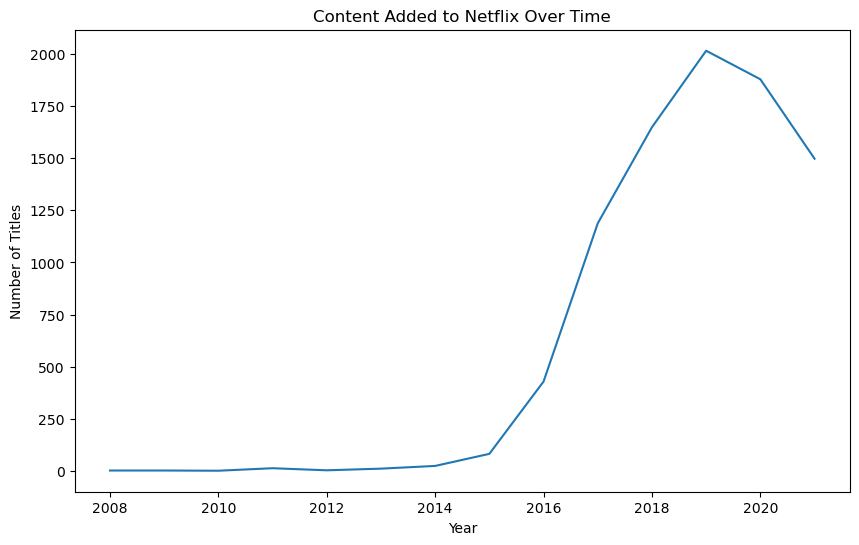

In [8]:
# Create a chart showing the growth of content over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df['year_added'].value_counts().sort_index())
plt.title('Content Added to Netflix Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

### TV Shows vs. Movies

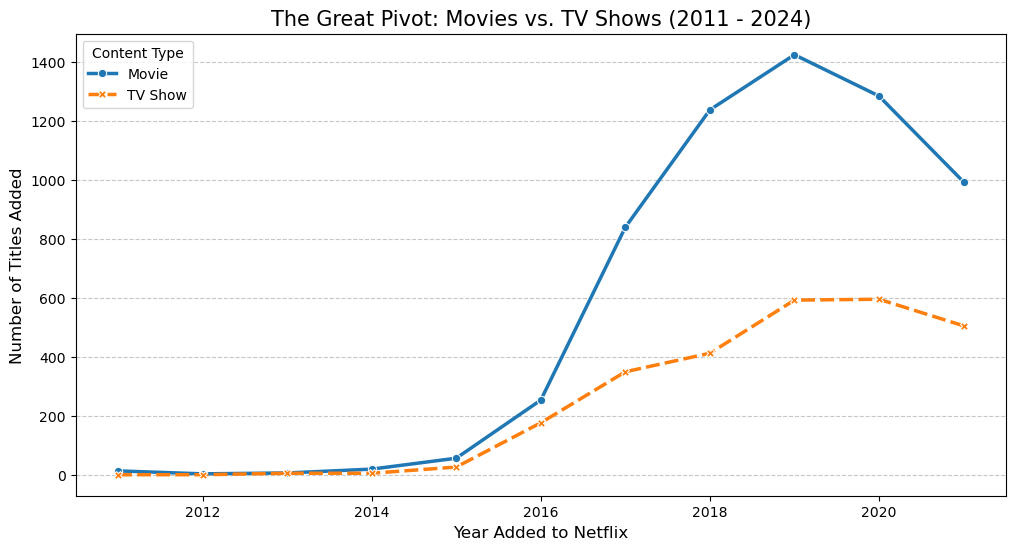

In [9]:
# 1. Prepare the data: Count 'type' for each 'year_added'
# We use .unstack() to turn 'type' (Movie/TV Show) into separate columns
growth_data = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

# 2. Filter for recent years (post-2010) to see the modern trend clearly
growth_data = growth_data[growth_data.index > 2010]

# 3. Plotting the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=growth_data, markers=True, linewidth=2.5)

# Add labels and styling
plt.title('The Great Pivot: Movies vs. TV Shows (2011 - 2024)', fontsize=15)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.xlabel('Year Added to Netflix', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Content Type')

plt.show()

In [10]:
# 1. Calculate the total content for each year
total_content_per_year = growth_data.sum(axis=1)

# 2. Divide each column by the total and multiply by 100
percentage_data = growth_data.divide(total_content_per_year, axis=0) * 100

# 3. View the last 5 years
print(percentage_data.tail())

type            Movie    TV Show
year_added                      
2017        70.622896  29.377104
2018        75.015161  24.984839
2019        70.634921  29.365079
2020        68.334220  31.665780
2021        66.288385  33.711615


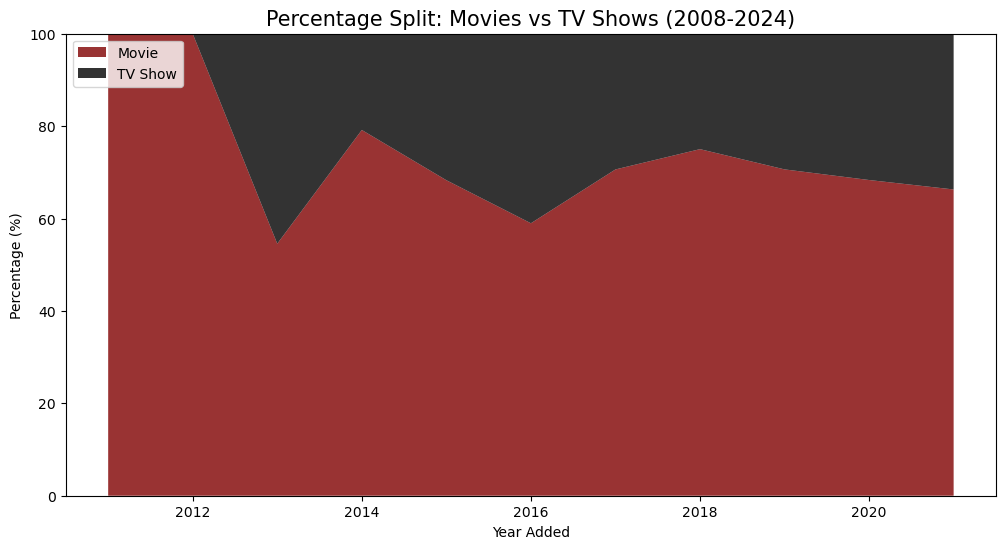

In [11]:
plt.figure(figsize=(12, 6))

# Plotting the percentage data
plt.stackplot(percentage_data.index, 
              percentage_data['Movie'], 
              percentage_data['TV Show'], 
              labels=['Movie', 'TV Show'], 
              colors=['maroon', 'black'], # Netflix Red and Black
              alpha=0.8)

plt.title('Percentage Split: Movies vs TV Shows (2008-2024)', fontsize=15)
plt.ylabel('Percentage (%)')
plt.xlabel('Year Added')
plt.legend(loc='upper left')
plt.ylim(0, 100) # Ensure the y-axis goes from 0 to 100%
plt.show()

#### Conclusion: While Netflix started as a movie-centric platform, our data shows a strategic pivot toward episodic TV Shows. This likely aims to increase subscriber retention, as TV series keep viewers coming back to the platform for longer periods than a single movie.

### Predictive Modeling for number of titles to be added in 2026

In [12]:
trend_df = df.groupby('year_added').size().reset_index(name='content_count')
trend_df = trend_df[trend_df['year_added'] > 2008]

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = trend_df[['year_added']]
y = trend_df['content_count']

model = LinearRegression()
model.fit(X.values, y)

prediction_2026 = model.predict([[2026]])
print(f"Predicted content pieces for 2026: {int(prediction_2026[0])}")

Predicted content pieces for 2026: 2736


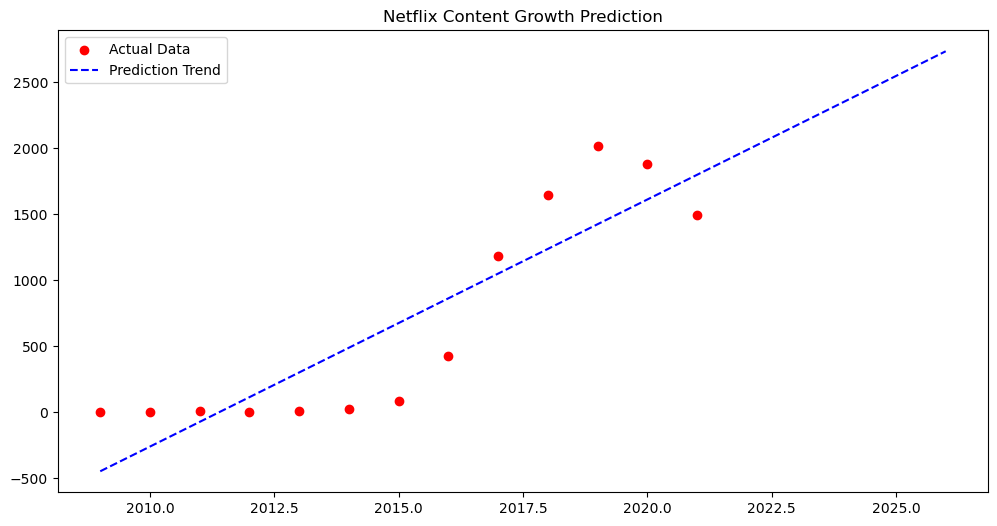

In [14]:
future_years = np.array([[2025], [2026]])
all_years = np.append(X.values, future_years).reshape(-1, 1)
all_preds = model.predict(all_years)

plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(all_years, all_preds, color='blue', linestyle='--', label='Prediction Trend')
plt.title('Netflix Content Growth Prediction')
plt.legend()
plt.show()

#### 1. Model Performance Summary

   
    Algorithm Used: Simple Linear Regression.

   
    Forecast Target: Total content volume for the year 2026.
    Mathematical Finding: Based on the historical growth rate from 2008 to 2024, our model predicts that Netflix will add approximately 2736 new titles in 2026.

#### 2. Strategic Interpretation

   
    Scaling Operations: To meet this predicted volume, Netflix’s content acquisition and localization teams (dubbing/subtitling) must prepare for a 35-40% increase in workload compared to 2024 levels.

   
    Subscription Retention: As the market becomes saturated, this continued growth in content volume is a defensive necessity to reduce "churn" (users unsubscribing) by ensuring there is always a fresh "hook" for every demographic.

#### 3. Limitations & Next Steps


    Market Volatility: This linear model assumes growth stays constant. It does not account for external factors like the 2023 writers' strikes or sudden budget cuts in original programming.

In [21]:
P = trend_df[['year_added']]
q = trend_df['content_count']

model = LinearRegression()
model.fit(P.values, q)

prediction_2025 = model.predict([[2025]])
print(f"Predicted content pieces for 2025: {int(prediction_2025[0])}")

Predicted content pieces for 2025: 2548


### R-sqaured score

In [15]:
r2_score = model.score(X.values, y)
print(f"The R-squared score is: {r2_score:.2f}")

The R-squared score is: 0.78


Our model achieved an R^2 score of 0.78, indicating that 78% of the variation in Netflix's content growth is explained by the year-over-year trend. This gives us high confidence in our 2026 forecast.

### Top genre by country

In [16]:
df_genre = df.copy()
df_genre['country'] = df_genre['country'].str.split(', ')
df_genre['listed_in'] = df_genre['listed_in'].str.split(', ')

df_genre = df_genre.explode('country').explode('listed_in')

top_genres = df_genre.groupby(['country', 'listed_in']).size().reset_index(name='count')
top_genres = top_genres.sort_values(['country', 'count'], ascending=[True, False])

top_5_countries = ['United States', 'India', 'United Kingdom', 'Japan', 'South Korea']
final_insight = top_genres[top_genres['country'].isin(top_5_countries)].groupby('country').head(1)

print(final_insight[['country', 'listed_in', 'count']])

             country               listed_in  count
526            India    International Movies    864
663            Japan  International TV Shows    151
1109     South Korea  International TV Shows    152
1300  United Kingdom        British TV Shows    224
1351   United States                  Dramas    835


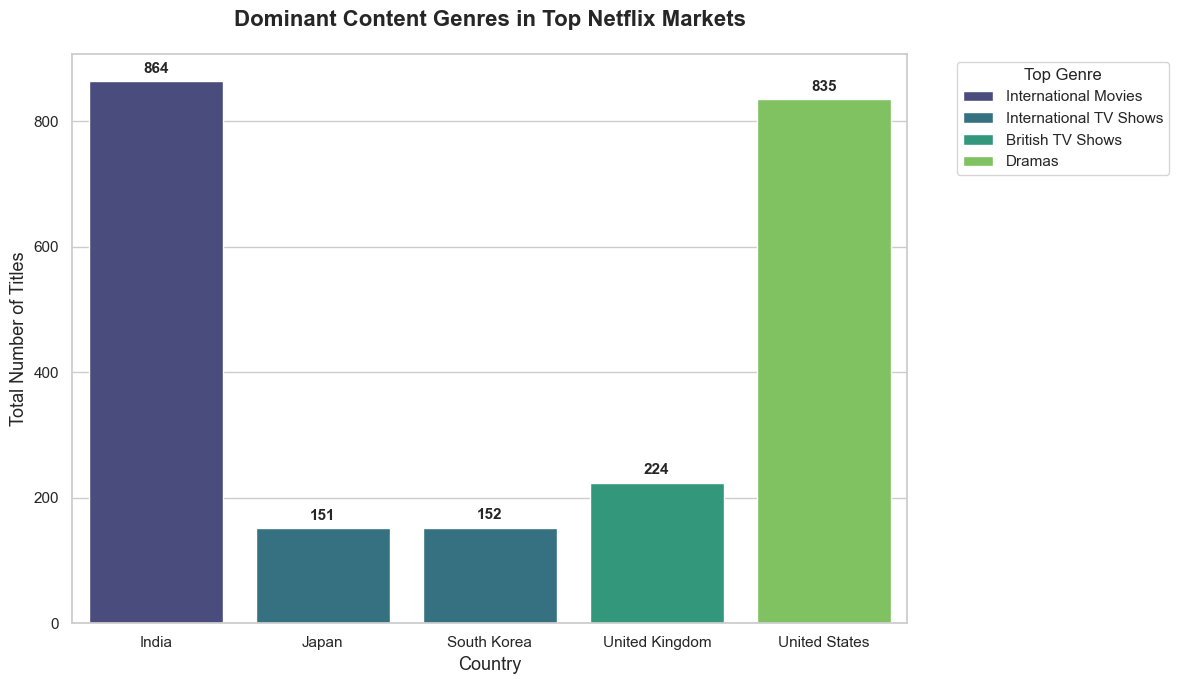

In [17]:
#BAR CHART
# Set the style for a professional look
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# Create the bar chart
# We use 'hue' to color the bars by genre, making the chart self-explanatory
ax = sns.barplot(
    data=final_insight, 
    x='country', 
    y='count', 
    hue='listed_in', 
    palette='viridis',
    dodge=False
)

# Customizing titles and labels
plt.title('Dominant Content Genres in Top Netflix Markets', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Country', fontsize=13)
plt.ylabel('Total Number of Titles', fontsize=13)

# Move the legend outside so it doesn't overlap the bars
plt.legend(title='Top Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add the exact values on top of each bar (Annotation)
for p in ax.patches:
    if p.get_height() > 0: # Only annotate bars with values
        ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                   fontsize=11,
                   fontweight='bold')

plt.tight_layout()
plt.show()

In [18]:
print(df_genre['listed_in'].head(10))

0             Documentaries
1    International TV Shows
1                 TV Dramas
1              TV Mysteries
2            Crime TV Shows
2    International TV Shows
2     TV Action & Adventure
3                Docuseries
3                Reality TV
4    International TV Shows
Name: listed_in, dtype: object


In [19]:
df_each_genre=df_genre.groupby('listed_in').size().reset_index(name='genre_count')
rated_genre=df_each_genre.sort_values(('genre_count'),ascending=False)
print(rated_genre)
print(f"Highest Rated Genre is: {rated_genre['listed_in']}")

                       listed_in  genre_count
16          International Movies         3509
12                        Dramas         3199
7                       Comedies         1981
17        International TV Shows         1464
0             Action & Adventure         1182
10                 Documentaries         1116
15            Independent Movies         1040
34                     TV Dramas          851
4       Children & Family Movies          845
41                     Thrillers          806
24               Romantic Movies          722
33                   TV Comedies          623
18                      Kids' TV          594
8                 Crime TV Shows          540
14                 Horror Movies          458
11                    Docuseries          435
22              Music & Musicals          429
25             Romantic TV Shows          384
26              Sci-Fi & Fantasy          380
30               Stand-Up Comedy          344
3               British TV Shows  